# Pandas tutorial from the XSEDE2016 workshop
Material based on tutorial from Srijith Rajamohan

In [59]:
from pandas import DataFrame, read_csv
import pandas as pd

d={'one': pd.Series([1., 2., 3.], index=['a', 'b', 'c']), 
   'two' :pd.Series([1., 2., 3., 4.], index=['a', 'b', 'c', 'd'])}

df=pd.DataFrame(d)
df

,one,two
a,1,1
b,2,2
c,3,3
d,NaN,4


In [60]:
names=['Bob', 'Jessica', 'Mary', 'John', 'Mel']
births=[968, 155, 77, 578, 973]

In [61]:
BabyDataSet=zip(names, births)
BabyDataSet

[('Bob', 968), ('Jessica', 155), ('Mary', 77), ('John', 578), ('Mel', 973)]

In [62]:
df=pd.DataFrame(data=BabyDataSet, columns=['Names', 'Births'])
df.to_csv('births1880.csv', index=False, header=False)

In [63]:
# Read in that csv file - don't treat first row as a header and provide column names
df=pd.read_csv('births1880.csv', header=None, names=['Names', 'Births'])
df

,Names,Births
0,Bob,968
1,Jessica,155
2,Mary,77
3,John,578
4,Mel,973


In [64]:
#look at top 2 rows
df.head(2)

,Names,Births
0,Bob,968
1,Jessica,155


In [65]:
#look at bottom 2 rows
df.tail(2)

,Names,Births
3,John,578
4,Mel,973


In [66]:
#return the pandas data frame as a numpy array
df.values

array([['Bob', 968],
       ['Jessica', 155],
       ['Mary', 77],
       ['John', 578],
       ['Mel', 973]], dtype=object)

In [67]:
df.index

Int64Index([0, 1, 2, 3, 4], dtype='int64')

In [68]:
plt=df['Births'].plot()

In [69]:
MaxValue=df['Births'].max()
MaxName=df['Names'][df['Births']==df['Births'].max()].values
MaxName

array(['Mel'], dtype=object)

In [70]:
df['Names'].unique()

array(['Bob', 'Jessica', 'Mary', 'John', 'Mel'], dtype=object)

In [71]:
print(df['Names'].describe())

count        5
unique       5
top       Mary
freq         1
Name: Names, dtype: object


In [72]:
d=[x for x in xrange(10)] 
d

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [73]:
df=pd.DataFrame(d)
df.columns=['Rev']
df['NewCol']=5

In [74]:
#perform operations on new column
df['NewCol']=df['NewCol']+1

In [75]:
#delete column!
del df['NewCol']
df

,Rev
0,0
1,1
2,2
3,3
4,4
5,5
6,6
7,7
8,8
9,9


In [76]:
# Assign index labels
i=['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
df.index=i
df

,Rev
a,0
b,1
c,2
d,3
e,4
f,5
g,6
h,7
i,8
j,9


In [77]:
#find based on index value
df.loc['a':'d']

,Rev
a,0
b,1
c,2
d,3


In [79]:
df.iloc[0:4]

,Rev
a,0
b,1
c,2
d,3


In [80]:
df['Rev']

a    0
b    1
c    2
d    3
e    4
f    5
g    6
h    7
i    8
j    9
Name: Rev, dtype: int64

In [84]:
df = pd.DataFrame(np.random.randn(5, 3), index=['a', 'c', 'e', 'f', 'h'], columns=['one', 'two', 'three'])
df.loc['a', 'two']=np.nan
df

,one,two,three
a,0.622645,NaN,-0.392282
c,-0.409997,0.100528,-0.508751
e,-0.338120,0.183499,-1.702672
f,-0.133321,0.421384,0.763158
h,-0.951676,0.226714,-0.514975


In [85]:
df.isnull()

,one,two,three
a,False,True,False
c,False,False,False
e,False,False,False
f,False,False,False
h,False,False,False


In [86]:
#set NaN to a number - note that the dataframe still tracks where the NaN was.
df.fillna(-999)

,one,two,three
a,0.622645,-999.000000,-0.392282
c,-0.409997,0.100528,-0.508751
e,-0.338120,0.183499,-1.702672
f,-0.133321,0.421384,0.763158
h,-0.951676,0.226714,-0.514975


In [87]:
df.query('one > 0')

,one,two,three
a,0.622645,NaN,-0.392282


In [89]:
df.query('one < 0 & two >0')

,one,two,three
c,-0.409997,0.100528,-0.508751
e,-0.338120,0.183499,-1.702672
f,-0.133321,0.421384,0.763158
h,-0.951676,0.226714,-0.514975


In [91]:
# lamba acts as a temporary function
# in this case it applies the difference between the max amd min of each column
df.apply(lambda x: x.max() - x.min())

one      1.574321
two      0.320856
three    2.465830
dtype: float64

In [94]:
df

,one,two,three
a,0.622645,NaN,-0.392282
c,-0.409997,0.100528,-0.508751
e,-0.338120,0.183499,-1.702672
f,-0.133321,0.421384,0.763158
h,-0.951676,0.226714,-0.514975


In [93]:
df.applymap(np.sqrt)
# note that the NaNs are restored, so the square root is not calcuated.
#minus values also now produce NaN

,one,two,three
a,0.789079,NaN,NaN
c,NaN,0.317062,NaN
e,NaN,0.428368,NaN
f,NaN,0.649141,0.873589
h,NaN,0.476145,NaN


In [97]:
s=pd.Series(np.arange(5), index=np.arange(5)[::-1], dtype='int64')
s.isin([2, 4, 6])

4    False
3    False
2     True
1    False
0     True
dtype: bool

In [98]:
s.where(s>3)

4   NaN
3   NaN
2   NaN
1   NaN
0     4
dtype: float64

In [ ]:
#grouping the data
#tells you how o organize the groups of data

In [104]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar', 'foo', 'bar', 'foo', 'foo'], 
                   'B':['one', 'one', 'two', 'three', 'two', 'two', 'one', 'three'], 
                   'C':np.random.randn(8), 
                  'D': np.random.randn(8)})
df

,A,B,C,D
0,foo,one,0.112252,-1.347336
1,bar,one,-0.555788,-0.980172
2,foo,two,-0.647975,-0.018414
3,bar,three,-0.572241,-0.432768
4,foo,two,2.838646,-1.078852
5,bar,two,0.225951,-2.211378
6,foo,one,-0.440032,-1.111082
7,foo,three,1.610609,1.218887


In [107]:
grouped1=df.groupby('A')
grouped2=df.groupby(['A', 'B'])
grouped3=df.groupby('A', sort=False)
grouped3.size()

A
foo    5
bar    3
dtype: int64

In [109]:
grouped1.describe()

C         D
A                            
bar count  3.000000  3.000000
    mean  -0.300692 -1.208106
    std    0.456161  0.910950
    min   -0.572241 -2.211378
    25%   -0.564014 -1.595775
    50%   -0.555788 -0.980172
    75%   -0.164918 -0.706470
    max    0.225951 -0.432768
foo count  5.000000  5.000000
    mean   0.694700 -0.467359
    std    1.488710  1.073271
    min   -0.647975 -1.347336
    25%   -0.440032 -1.111082
    50%    0.112252 -1.078852
    75%    1.610609 -0.018414
    max    2.838646  1.218887

In [114]:
list(grouped3)

[('foo',      A      B         C         D
  0  foo    one  0.112252 -1.347336
  2  foo    two -0.647975 -0.018414
  4  foo    two  2.838646 -1.078852
  6  foo    one -0.440032 -1.111082
  7  foo  three  1.610609  1.218887), ('bar',      A      B         C         D
  1  bar    one -0.555788 -0.980172
  3  bar  three -0.572241 -0.432768
  5  bar    two  0.225951 -2.211378)]

In [117]:
grouped3.first()

,B,C,D
A,,,
bar,one,-0.555788,-0.980172
foo,one,0.112252,-1.347336


In [120]:
#apply your own functions to each group
grouped3['C'].agg([sum, mean])

,sum,mean
A,,
foo,3.473501,0.694700
bar,-0.902077,-0.300692


In [125]:
f=lambda x:x*2
grouped3.filter(lambda x: sum(x['C'])>0)

,B,C,D
0,one,0.112252,-1.347336
2,two,-0.647975,-0.018414
4,two,2.838646,-1.078852
6,one,-0.440032,-1.111082
7,three,1.610609,1.218887


# Matplotlib

In [127]:
matplotlib.matplotlib_fname()


u'/Applications/anaconda/lib/python2.7/site-packages/matplotlib/mpl-data/matplotlibrc'

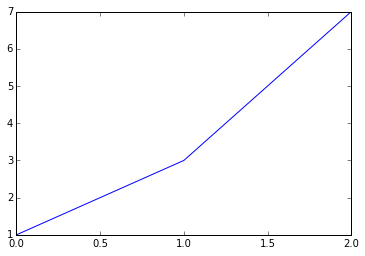

In [132]:
%matplotlib inline
import pylab as pl
pl.ioff()
pl.isinteractive()
x=[1, 3, 7]
plot(x)
show()